## Time Series Modeling
- we need to forcast the furniture sales Category for next one year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)

df = pd.read_excel(r"Datasets/Sample - Superstore.xls",header=0)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [5]:
furniture=df[df.Category=='Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [6]:
furniture.shape

(2121, 21)

In [7]:
furniture.dtypes #note date col must be datetime dtype so we can apply agg funcs and plot line graphs in asc order

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
#we consider order date as date column here

In [9]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [10]:
furniture= furniture[['Order Date','Sales']]
furniture.shape

(2121, 2)

In [11]:
furniture.head(10)

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


In [12]:
furniture.sort_values('Order Date',ascending=True,inplace=True)

In [13]:
furniture.head(10) #we see there are many obs for one date do group by

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [14]:
furniture.isnull().sum() #no nan values

Order Date    0
Sales         0
dtype: int64

In [15]:
furniture['Order Date'].value_counts() #there are many obs for single date deal with group by function

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

In [16]:
furniture= furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [17]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [18]:
#we got unique date values now we can set date variable as index column of dataframe

In [19]:
furniture.set_index('Order Date',inplace=True)

In [20]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [21]:
# we do not have equally spaced data variable we need to resample the data 54 weeks in 1 year

In [22]:
y= furniture.Sales.resample('M').mean()
y.shape

(48,)

In [23]:
y

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

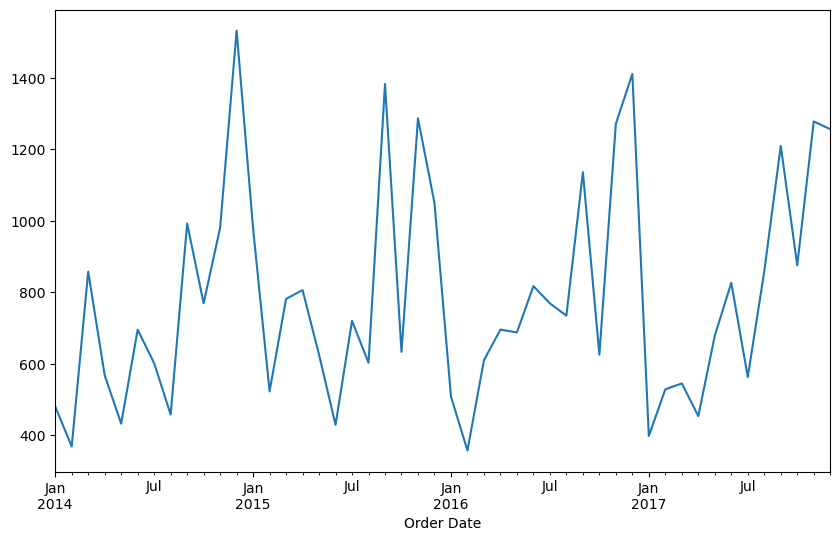

In [24]:
y.plot(figsize=(10,6))
plt.show()

In [25]:
# we see a proper trend in monthly resampling
#in a year we see a pattern thta jan sales is less then it keeps on changing it reaches high peak at the end of year

In [26]:
train=y.loc[:'2016-12-31']
train.shape

(36,)

In [27]:
train

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [28]:
test=y.loc['2017-01-31':]
test.shape

(12,)

In [29]:
test

Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

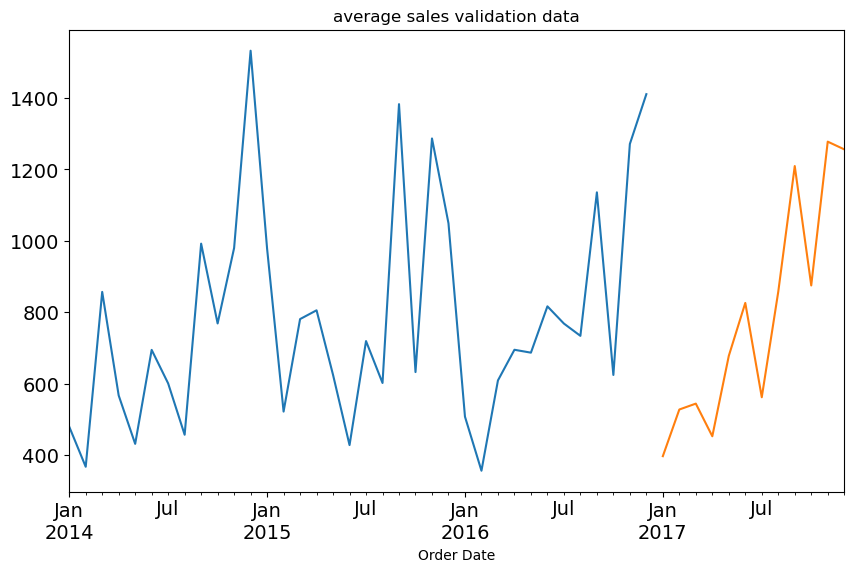

In [30]:
#plotting data
train.plot(figsize=(10,6),title='average sales training data',fontsize=14)
test.plot(figsize=(10,6),title='average sales validation data',fontsize=14)
plt.show()

- there is no trend in data
- there is yearly seasonality in data

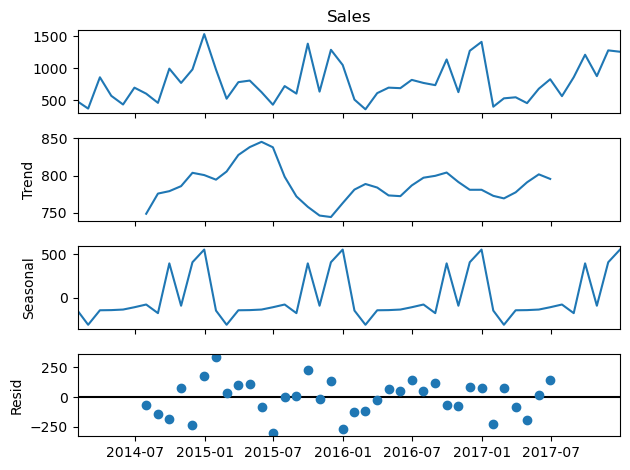

In [31]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

1st plot is actual line plot for observed data
trend if we see a line increasing and decreasing there is trend random no trend
seasonality if we see repeating patterns in weeks/months/years
bottom we can see date to refer

there is no trend there is yearly seasonality

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


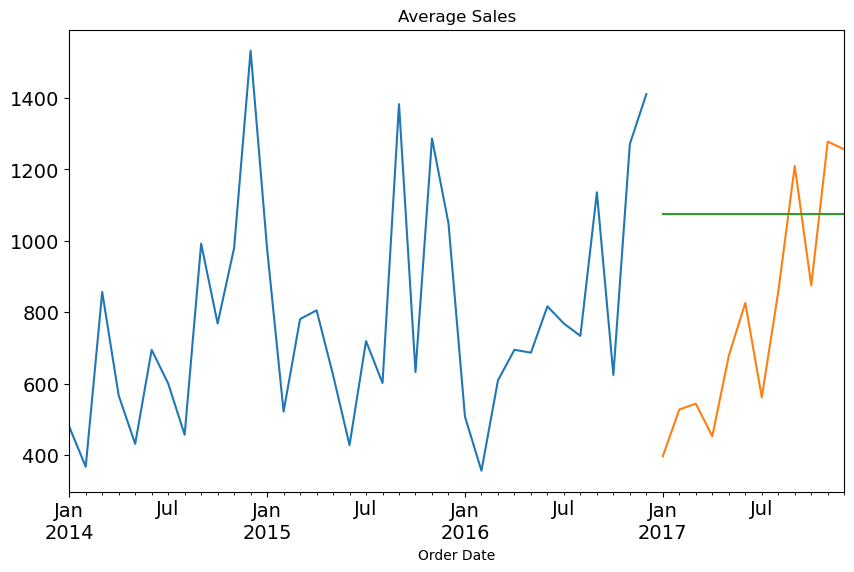

In [32]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values
#values close to 0 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.3)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [33]:
#note as our model has seasonality yearly so simple exponential smoothning is not suitable here
#for try we took alpha=0.3 (close to 0) stating that we want to give importance to all values not most recent values of y
#as we see we have no trend of most recent value but a seasonality more stable trend
#here it is suitable for no trend +no seasonality so a horizontal line is plot as predictions, here predictions is a single value
#this is suitable for more horizontal time series plot 

In [34]:
Exp_Smooth.SES #same value predictions of ses model as more of horizontal line is plot the predicted line

2017-01-31    1075.393646
2017-02-28    1075.393646
2017-03-31    1075.393646
2017-04-30    1075.393646
2017-05-31    1075.393646
2017-06-30    1075.393646
2017-07-31    1075.393646
2017-08-31    1075.393646
2017-09-30    1075.393646
2017-10-31    1075.393646
2017-11-30    1075.393646
2017-12-31    1075.393646
Freq: M, dtype: float64

In [35]:
#aic metric is always used to find best model for same data same model but helps us determine best hyper params for model
#aic should be lowest as possible for best model
fit1.aic

417.12673987539426

In [36]:
#rmse is useful for same data and different models comparing the best model least rmse value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_ses=sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse_ses)

417.25382698888956


In [37]:
#Holt Exponential smoothning - is for trend but no seasonality in data, here a linear line is plotted as predictions
# predictions are linear menas either increasing or decreasing

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


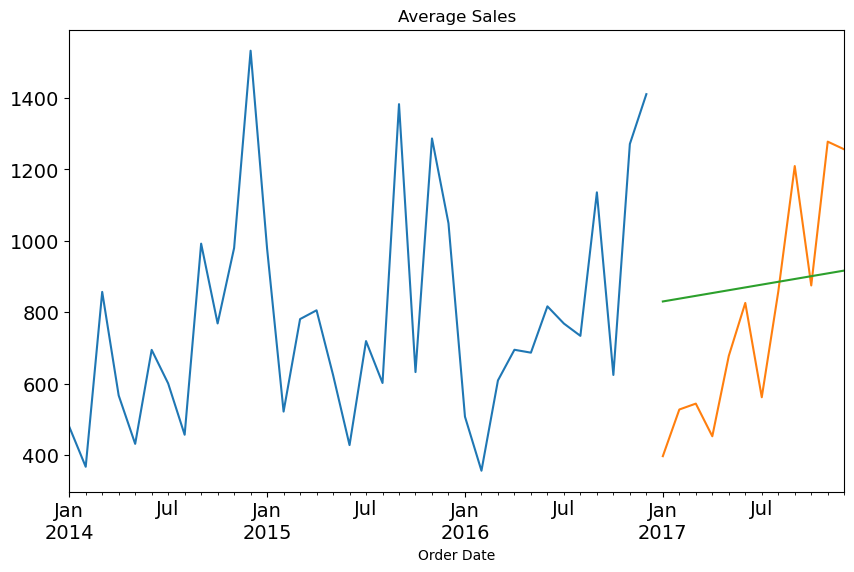

In [38]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()

#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.3)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [39]:
fit1.aic

449.39630831311894

In [40]:
Holt_df['Holt_linear'] #here an increasing linear line are predictions so increasing values are predictions

2017-01-31    830.579226
2017-02-28    838.437043
2017-03-31    846.294860
2017-04-30    854.152677
2017-05-31    862.010493
2017-06-30    869.868310
2017-07-31    877.726127
2017-08-31    885.583944
2017-09-30    893.441760
2017-10-31    901.299577
2017-11-30    909.157394
2017-12-31    917.015211
Freq: M, dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_holt=sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse_holt)

291.9383998605118


In [42]:
#below code to find the best hyper param that get a lower aic using for loop

In [43]:
"""
 
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic
 
"""

"\n \nimport numpy as np\nmy_dict={}\nfor i in np.arange(0.01,1,0.01):\n    for j in np.arange(0.01,1,0.01):\n        #from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        #soothing slope=beta\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        #Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        #print(fit1.aic,i,j)\n        my_dict[i,j] = fit1.aic\n \n"

In [44]:
"""
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])
"""

'\nfor k in my_dict:\n    if my_dict[k]==min(my_dict.values()):\n        print(k,":",my_dict[k])\n'

In [45]:
#holt-winter model expo smoothning is for seasonality+trend/no trend, here the predicted line has trend component too
#predictions have fluatuations in data

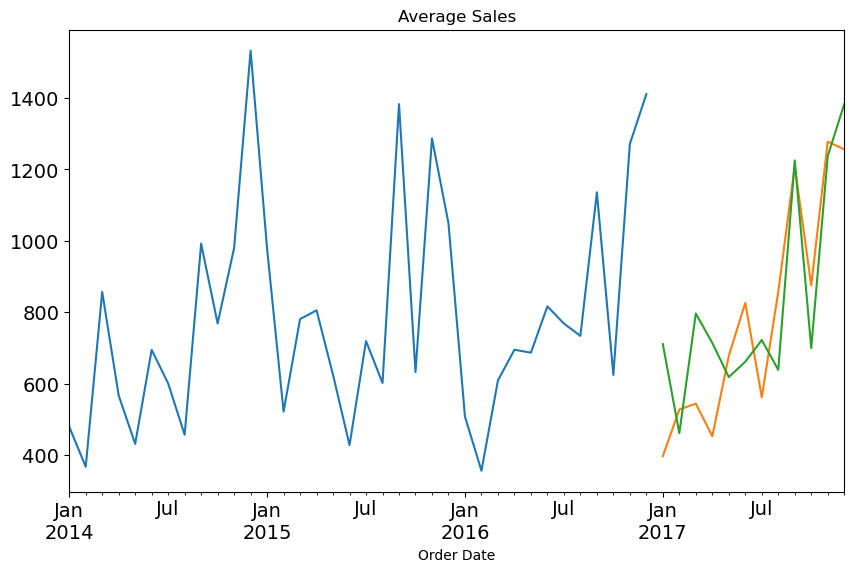

In [46]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='mul').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [47]:
#additive models are more suitable when there is no trend(+ve,-ve) in data and mutiplicative models are more suitable when there is trend in the data
#trend='add',seasonal=add, or mul can be used as additional hyper param to get better model
#here trend=add means overall data no trend
#here season=mul means there is trend within a season period of 12 months increasing trend we can see

In [48]:
fit1.aic

390.0160003355687

In [49]:
Holt_Winter_df['Holt_Winter'] #flatuations in predictions because of trend

2017-01-31     711.033129
2017-02-28     461.847426
2017-03-31     796.785826
2017-04-30     714.564080
2017-05-31     618.885589
2017-06-30     661.983978
2017-07-31     722.658392
2017-08-31     639.155699
2017-09-30    1225.218695
2017-10-31     699.806212
2017-11-30    1237.283271
2017-12-31    1382.777930
Freq: M, dtype: float64

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_holt_winter=sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse_holt_winter)

179.63710981055772


In [51]:
# Lowest RMSE value is Holt -winter model expo smoothning so we go with this model

## Lets train the model with entire given data Sales column and date index and forcast the Sales of Furniture for next 12 months(1 year)

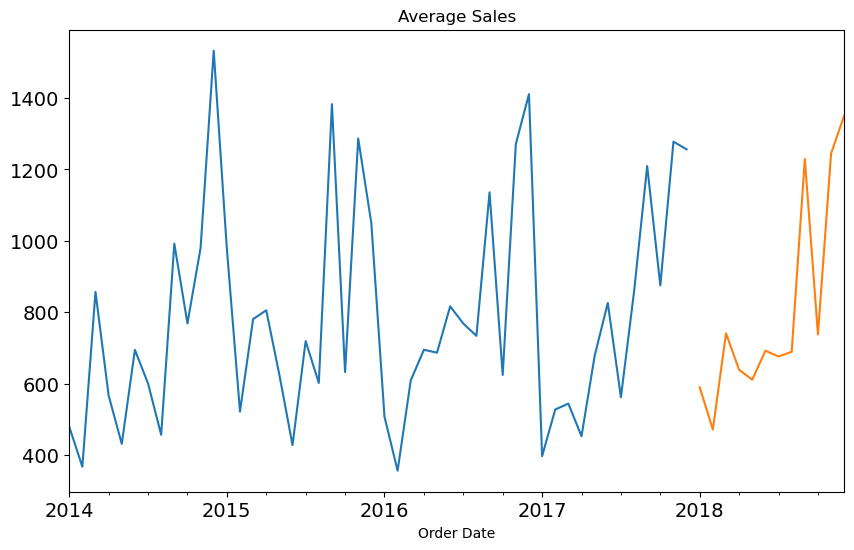

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing #using Holt-Winter exponential smoothning model

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='mul').fit() #use entire y for training
Y_predictions = fit1.forecast(steps=12) #forcast for next 12 months
#Y_predictions = fit1.predict(start=pd.to_datetime('1017-01-31'),steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) #future forcast

plt.show()

In [53]:
#predict is another function that can be used for validation set of data we can pass start= some date param
#forcast is for recommended for forcasting ahead of time for next years

In [54]:
Y_predictions #these are final predictions to deliever to client
#steps=12 means 1 more year ahead from train data forcast is done means 2018 year forcast below 

2018-01-31     590.274585
2018-02-28     471.985658
2018-03-31     741.546725
2018-04-30     639.124855
2018-05-31     611.697061
2018-06-30     692.756167
2018-07-31     676.578424
2018-08-31     689.790763
2018-09-30    1229.423539
2018-10-31     738.127015
2018-11-30    1244.671051
2018-12-31    1351.023770
Freq: M, dtype: float64

In [55]:
Y_predictions.to_excel('TimeSeries_SalesForcast_Output.xlsx',header=['Sales'],index=True) 
#store final predictions sales with date column

In [56]:
#Note: exponential smoothning is more prediction close to the latest years data so latest values predict next years
#and less dependent on older date values
#also time series is limited to few years of forcast as data and change wrt time in future
#recommended is few next years forcast
#so expo smoothning gives predicted line as per latest date pattern not older so use expo smoothning for less no of steps few yeaars forcast for better result
#wait for latest data to come for future predictions

In [57]:
#!pip install pmdarima

In [58]:
import pmdarima as pm
#pip install pmdariam --user

In [59]:
# identification step
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.18 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.27 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.14 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.26 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.78 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.17 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.35 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=1.09 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=2.03 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=2.00 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.95 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=1.16 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train,order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

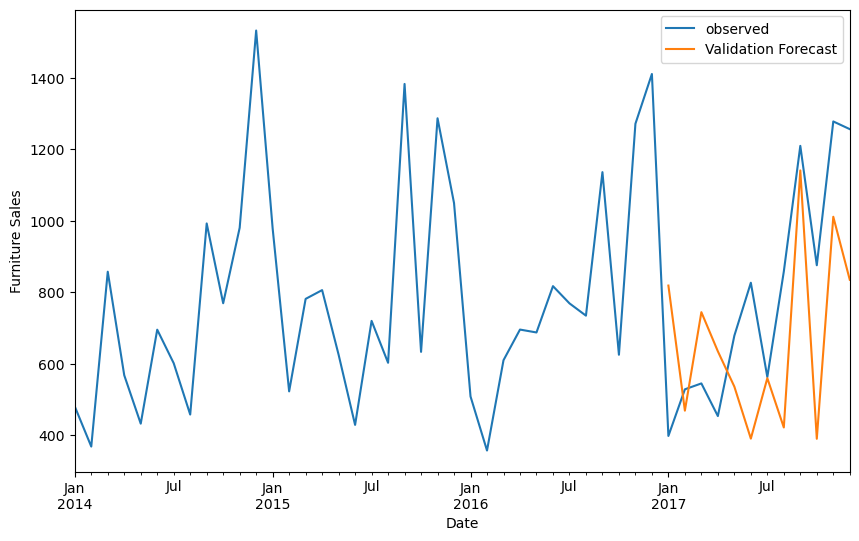

In [61]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [62]:
pred.predicted_mean

2017-01-31     818.524058
2017-02-28     468.470303
2017-03-31     744.079613
2017-04-30     634.497925
2017-05-31     535.745764
2017-06-30     390.163744
2017-07-31     559.376227
2017-08-31     421.341558
2017-09-30    1140.775307
2017-10-31     389.701041
2017-11-30    1011.052460
2017-12-31     834.732300
Freq: M, Name: predicted_mean, dtype: float64

In [63]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]
 
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

308.76975396633634


In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(y,order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

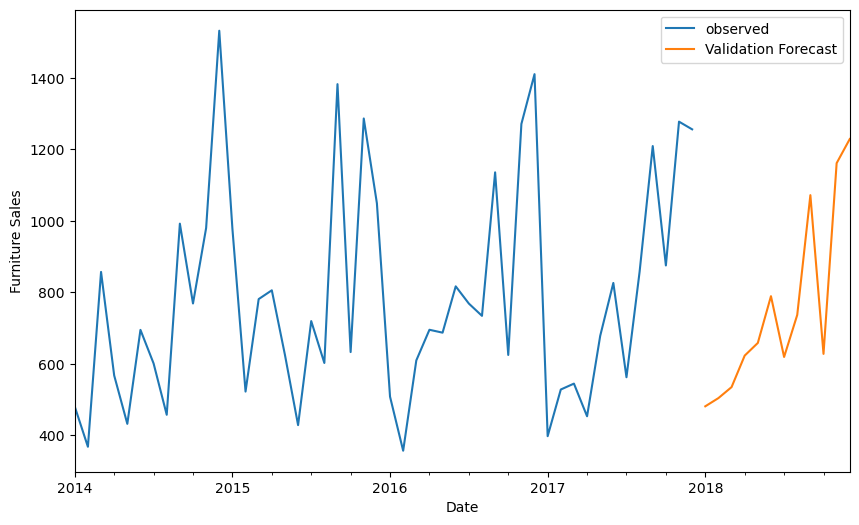

In [65]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [66]:
pred.predicted_mean

2018-01-31     481.175782
2018-02-28     504.162671
2018-03-31     534.896811
2018-04-30     623.058252
2018-05-31     658.537447
2018-06-30     789.387677
2018-07-31     619.269519
2018-08-31     736.930522
2018-09-30    1072.136422
2018-10-31     627.864101
2018-11-30    1161.662892
2018-12-31    1229.291166
Freq: M, Name: predicted_mean, dtype: float64

In [67]:
pred.predicted_mean.to_excel('TimeSeriesOutput_ARIMA.xlsx',header='Sales',index=True)

- Holt winter is the best model here i choose hotel winter model with least RMSE: 179.63710981055772